In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def load_img():
    blank_img = np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img, text='ABCDE', org=(50,300), 
               fontFace = font, fontScale=5, color=(255,255,255),
               thickness= 25, lineType=cv2.LINE_AA)
    return blank_img

In [6]:
def display_img(img):
    fig = plt.figure(figsize= (12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

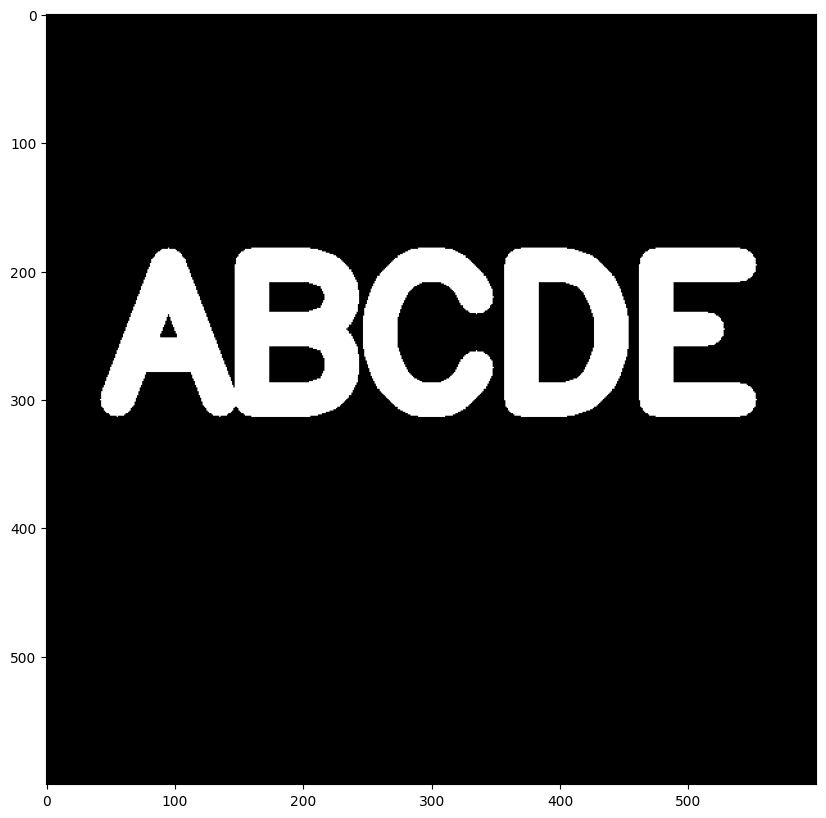

In [7]:
img = load_img()
display_img(img)

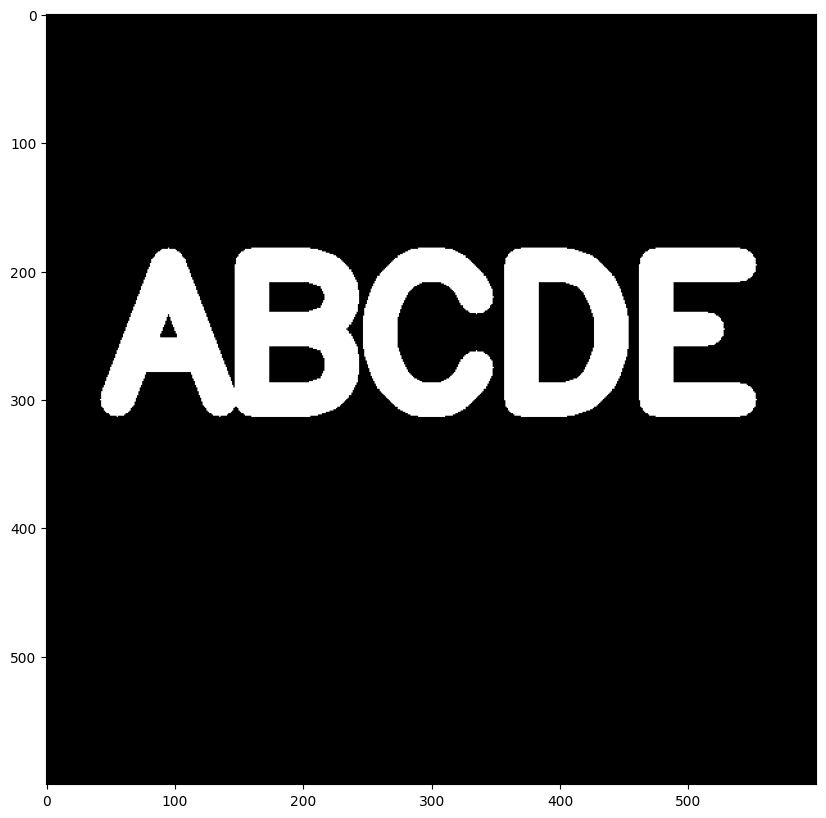

In [8]:
img = load_img()
display_img(img)

In [32]:
kernel =  np.ones((5,5), dtype=np.uint8)
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [10]:
iterations = 5
result = cv2.erode(img, kernel, iterations = iterations)

## erode는 침식 
## iterations는 침식 횟수 

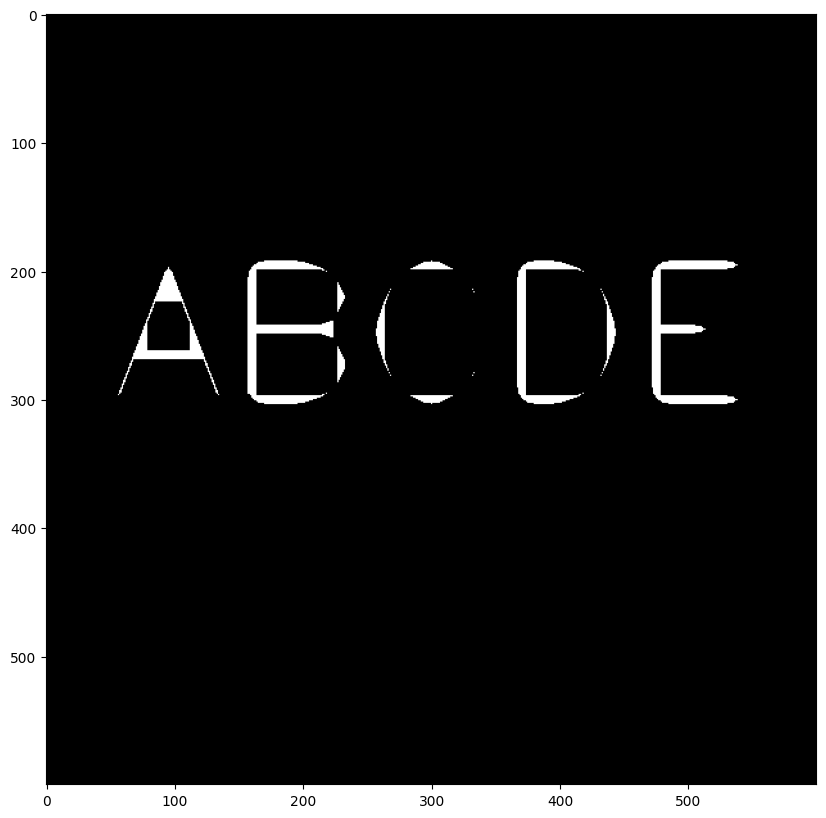

In [11]:
display_img(result)

In [17]:
img = load_img()

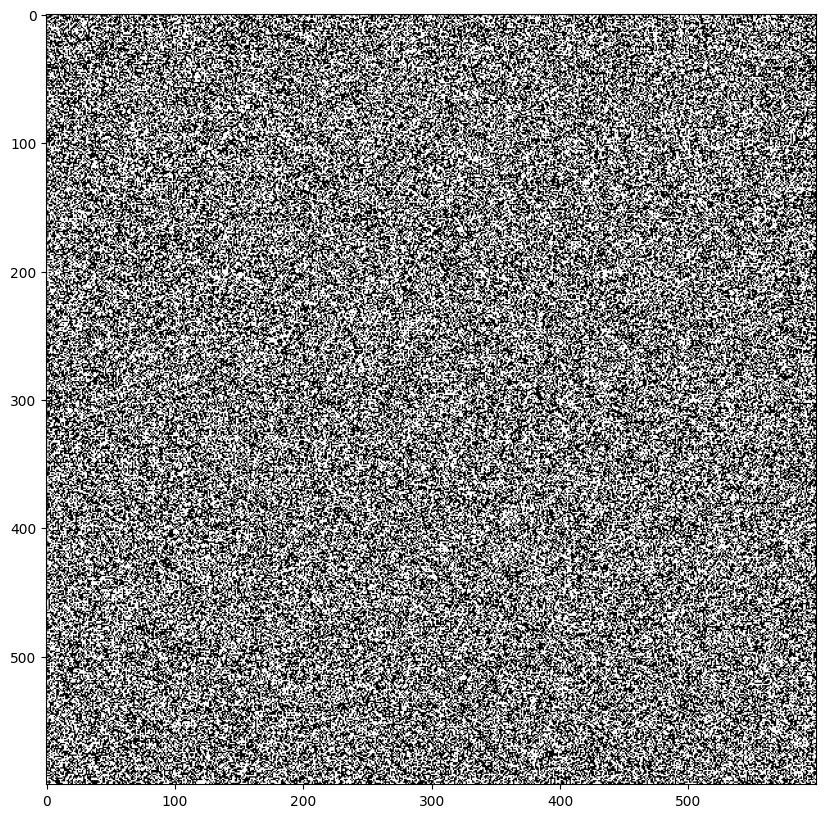

In [18]:
white_noise = np.random.randint(low=0, high=2, size=(600,600))
## 0 ~ 1 randint 난수 생성 
## 노이즈 사진 만들기 
display_img(white_noise)

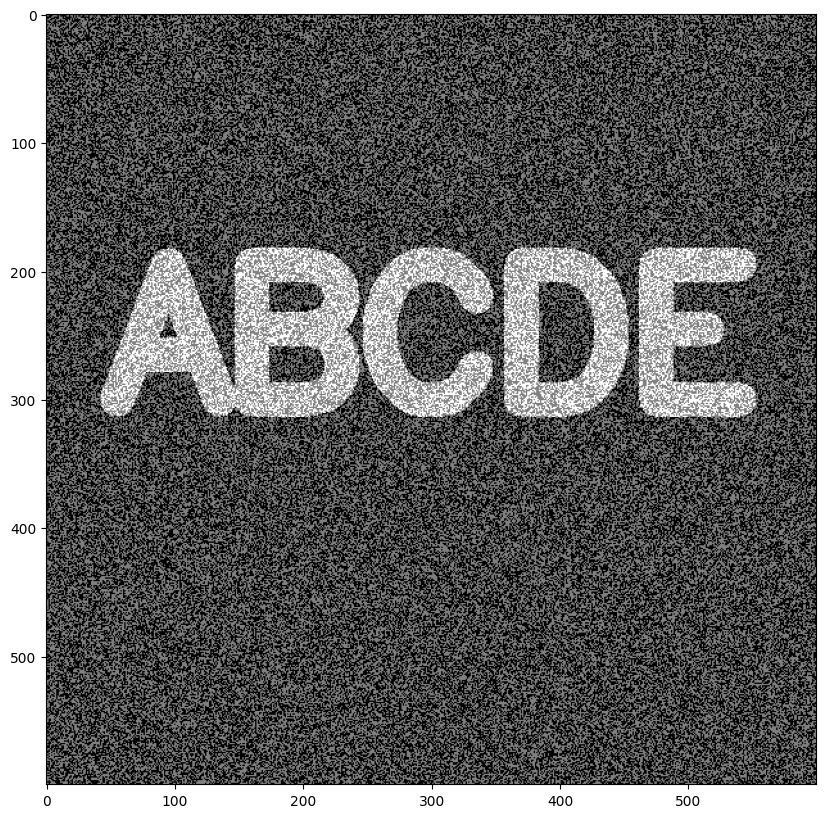

In [20]:
noise_img = white_noise * 255 + img
display_img(noise_img)

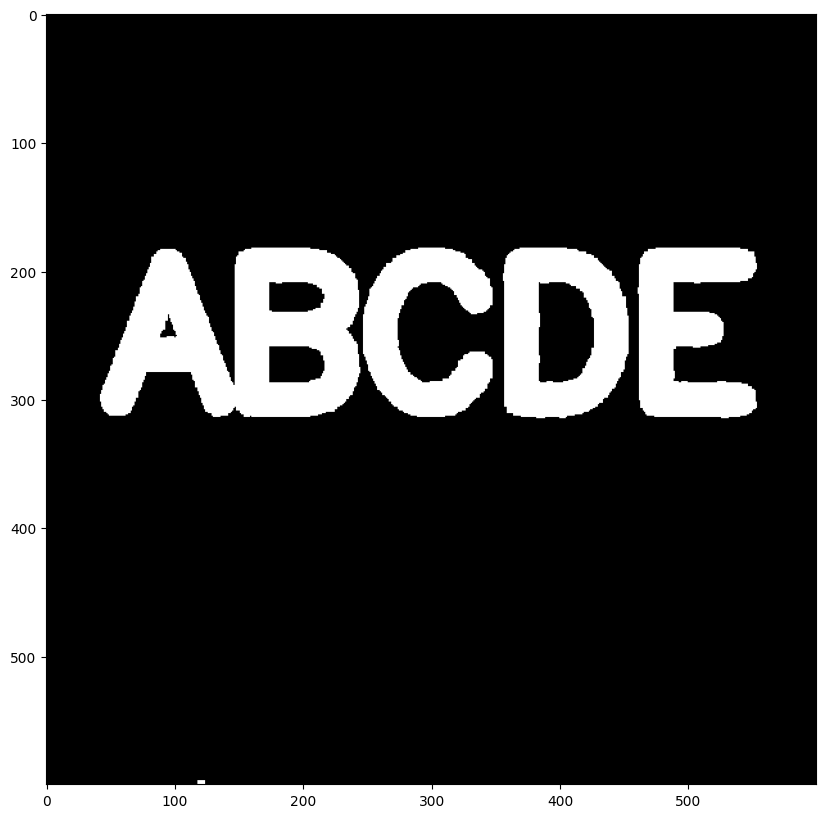

In [21]:
opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel)

## 오프닝 연산 = 열기 -> 침식 -> 팽창 
display_img(opening)

In [22]:
img = load_img()

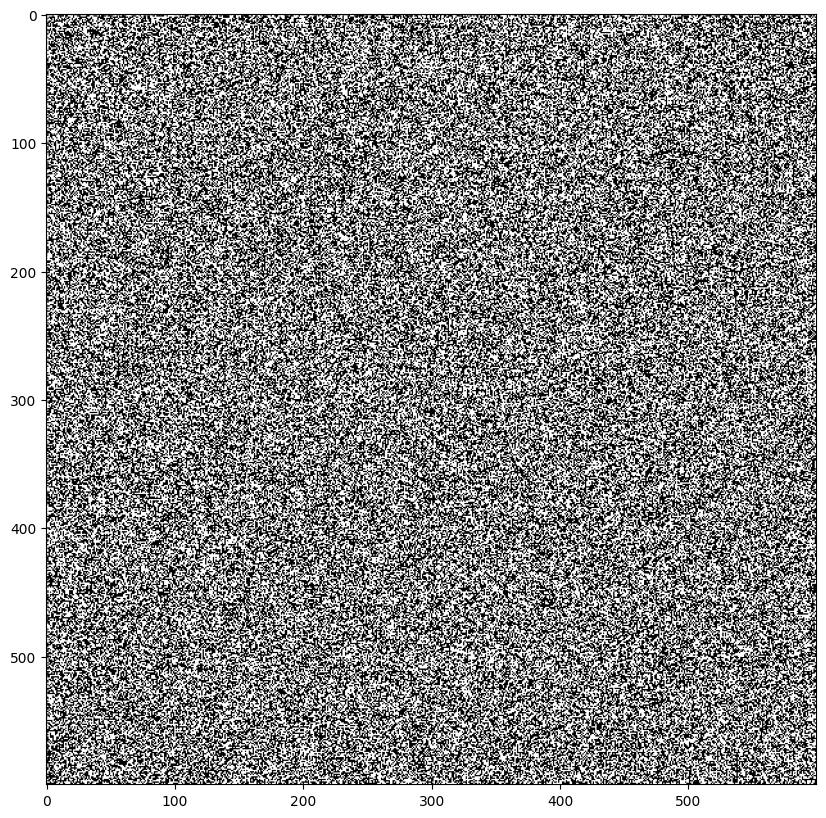

In [23]:
black_noise = np.random.randint(low=0, high=2, size=(600,600))
black_noise = black_noise *(-img.max())
display_img(black_noise)

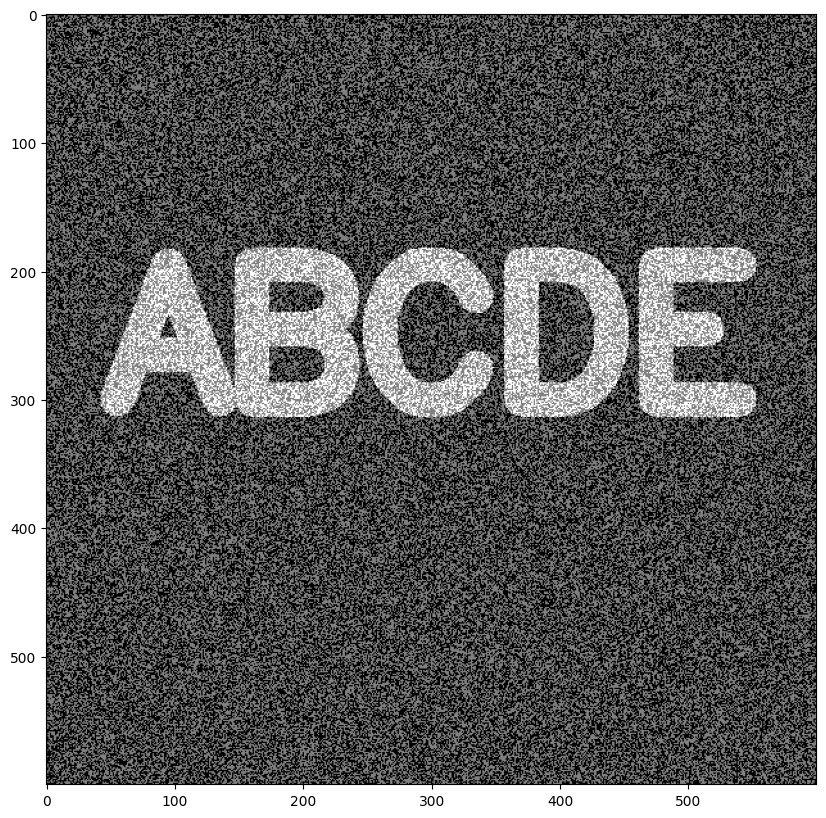

In [26]:
black_noise_img = black_noise + img
display_img(black_noise_img)

In [27]:
black_noise_img[black_noise_img == -255] = 0
black_noise_img.min()

0.0

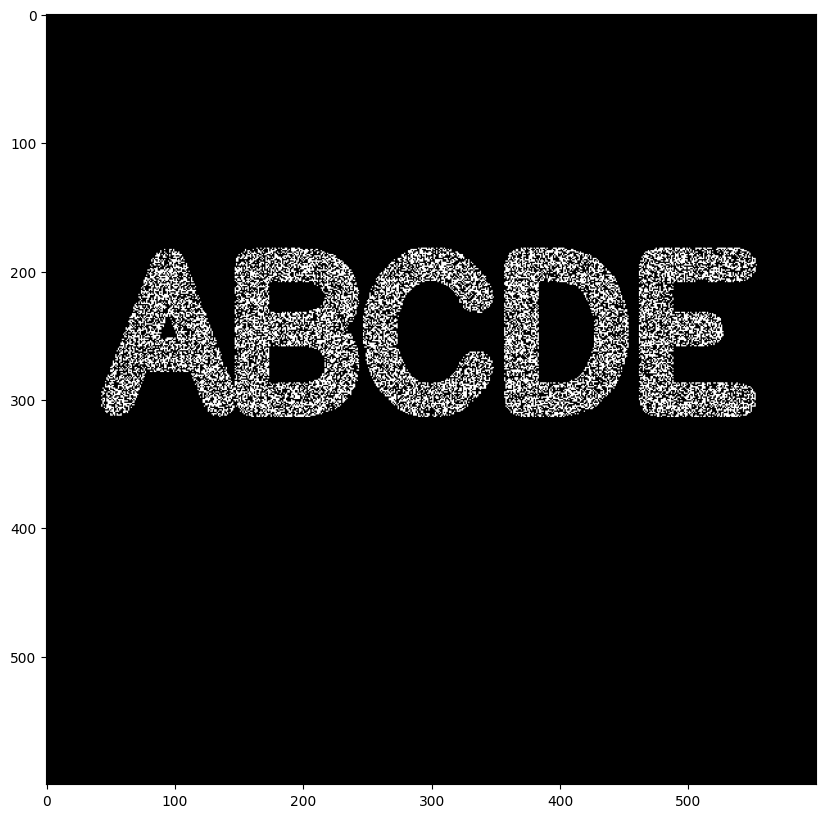

In [28]:
display_img(black_noise_img)

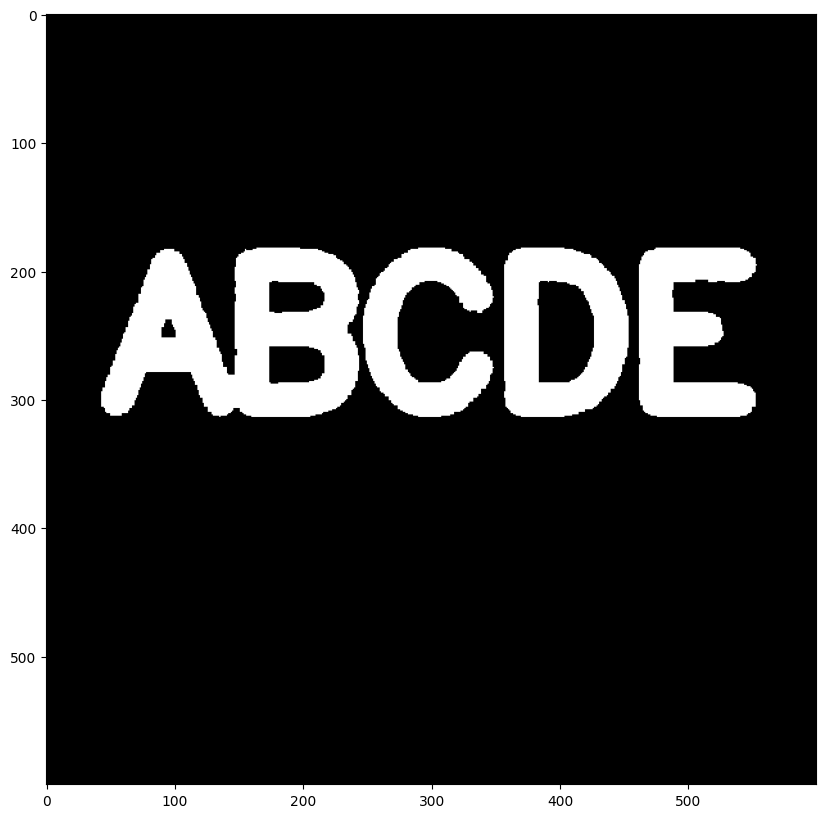

In [29]:
closing = cv2.morphologyEx(black_noise_img, cv2.MORPH_CLOSE, kernel)
display_img(closing)

## 클로징 연산
## 닫기 


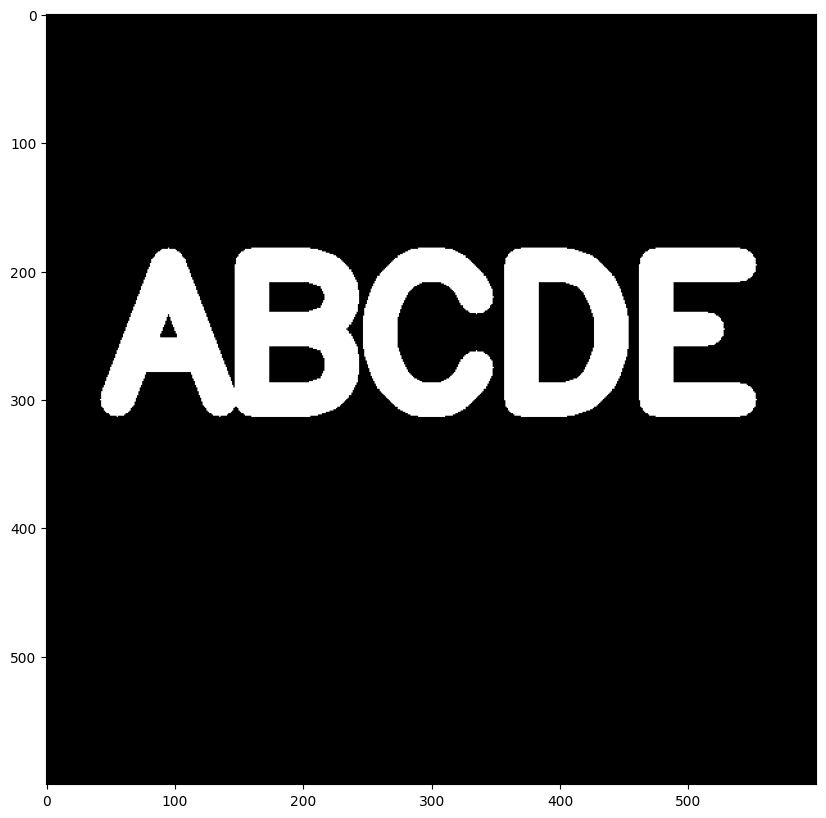

In [30]:
img = load_img()
display_img(img)

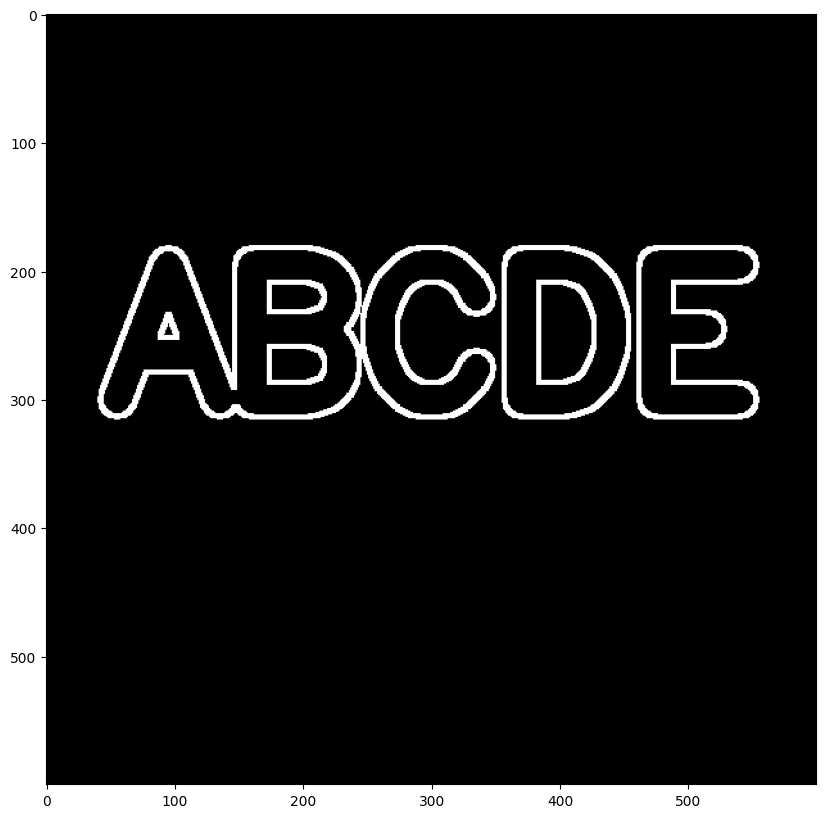

In [34]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
display_img(gradient)

In [35]:
# 그래디언트는 미분 
# 흰색 검은색으로의  픽셀 변화를 알 수 있음 

In [40]:
def display_img(img):
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap = 'gray')

In [41]:
img = cv2.imread('../data/sudoku.jpg', 0)

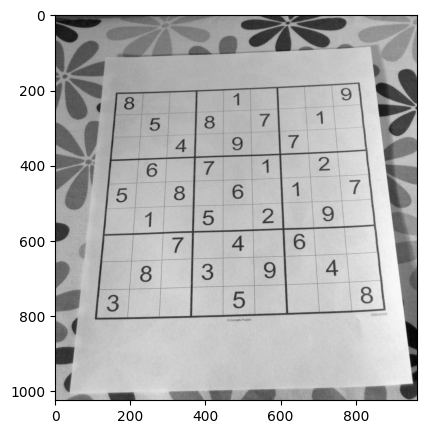

In [42]:
display_img(img)

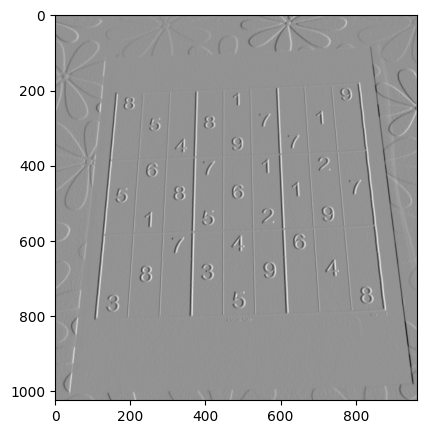

In [43]:
sobelx = cv2.Sobel(img, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)
display_img(sobelx)

## 그래디언트 중ㅈ 소벨 연산자 (소벨 필터링)

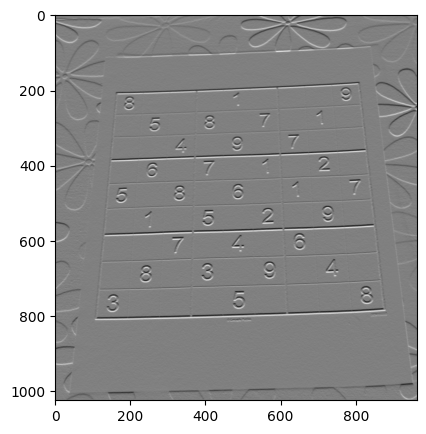

In [45]:
sobely = cv2.Sobel(img, ddepth = cv2.CV_64F, dx=0, dy=1, ksize=5)
display_img(sobely)

## 그래디언트 중 소벨y축 연산자 
## Sobel( ddepth 는 결과 이미지 데이터 타입)

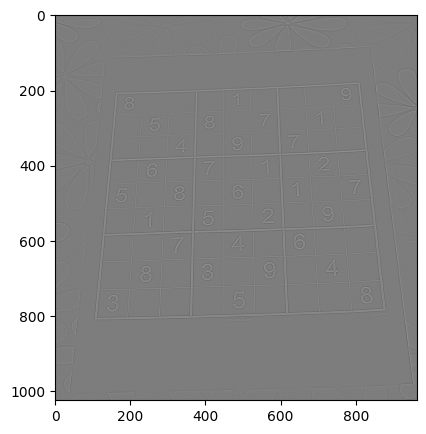

In [46]:
laplacian = cv2.Laplacian(img, ddepth = cv2.CV_64F)
display_img(laplacian)

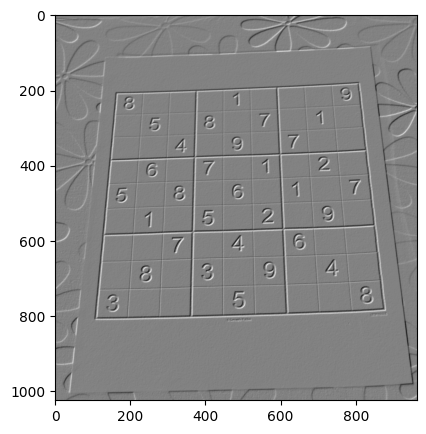

In [48]:
blended = cv2.addWeighted(src1=sobelx, alpha =0.5, src2=sobely, beta =0.5 ,gamma = 0)
display_img(blended)

## 소벨 그래디언트 필터는 x축 y축 따로 더해줘야 한다. 

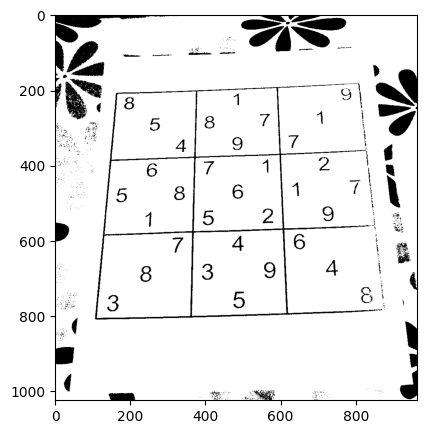

In [49]:
ret, th1 = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)
display_img(th1)

## threshold blur 
## 100 보다 크면 255 100보다 작으면 img 

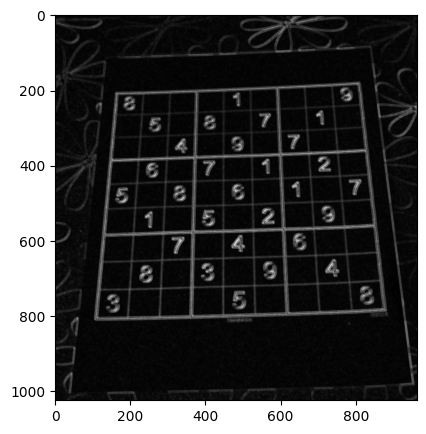

In [50]:
kernel = np.ones((4,4), np.uint8)
gradient = cv2.morphologyEx(blended, cv2.MORPH_GRADIENT, kernel)
display_img(gradient)

## cv2.morphhologyEx(src, op kernel)
## op = 모폴로지 연산 플래그 
## op 중 cv2.MORPH_GRADIENT 는 팽창 - 침식 